In [1]:
from langgraph.graph import StateGraph, END
from responder_engine import ResponderEngine
from typing import TypedDict

In [2]:
class ConvertState(TypedDict):
    original_chunks : str
    xml_chunks : str
    target : str
    pseudo_code: str
    conversion : str

In [14]:
new_graph = StateGraph(ConvertState)
engine = ResponderEngine()

In [15]:
def pseudo_code_agent(state):
    xml_chunks = state["xml_chunks"]
    print("generating pseudo code..")
    pseudo_code = engine.generate_pseudo_code(xml_chunks)
    return{
        "xml_chunks" : xml_chunks,
        "pseudo_code": pseudo_code
    }

In [16]:
def java_converter(state):
    original_chunks = state["original_chunks"]
    pseudo_code = state["pseudo_code"]
    print("Entered Java conversion agent ...")
    conversion = engine.java_converter(original_chunks, pseudo_code)
    return{
        "original_chunks": original_chunks,
        "pseudo_code": pseudo_code,
        "conversion" : conversion
        }

In [17]:
def pyspark_converter(state):
    original_chunks = state["original_chunks"]
    pseudo_code = state["pseudo_code"]
    print("Entered Pyspark conversion agent ...")
    conversion = engine.pyspark_converter(original_chunks, pseudo_code)
    return{
        "original_chunks": original_chunks,
        "pseudo_code": pseudo_code,
        "conversion" : conversion
        }

In [18]:
def scala_converter(state):
    original_chunks = state["original_chunks"]
    pseudo_code = state["pseudo_code"]
    print("Entered Scala conversion agent ...")
    conversion = engine.scala_converter(original_chunks, pseudo_code)
    return{
        "original_chunks": original_chunks,
        "pseudo_code": pseudo_code,
        "conversion" : conversion
        }

In [19]:
def sql_converter(state):
    original_chunks = state["original_chunks"]
    pseudo_code = state["pseudo_code"]
    print("Entered SQL conversion agent ...")
    conversion = engine.sql_converter(original_chunks, pseudo_code)
    return{
        "original_chunks": original_chunks,
        "pseudo_code": pseudo_code,
        "conversion" : conversion
        }

In [20]:
def router_node(state):
    target = state["target"]
    if target.lower() == 'java':
        return 'java_converter'
    elif target.lower() == 'pyspark':
        return 'pyspark_converter'
    elif target.lower() == 'scala':
        return 'scala_converter'
    else:
        return 'sql_converter'

In [21]:
new_graph.add_node("Pseudocode", pseudo_code_agent)
new_graph.add_node("java_converter", java_converter)
new_graph.add_node("pyspark_converter", pyspark_converter)
new_graph.add_node("scala_converter", scala_converter)
new_graph.add_node("sql_converter", sql_converter)

In [22]:
new_graph.set_entry_point("Pseudocode")
# graph.add_edge(START, "Pseudocode")
new_graph.add_conditional_edges("Pseudocode", router_node)
new_graph.add_edge("java_converter", END)
new_graph.add_edge("pyspark_converter", END)
new_graph.add_edge("sql_converter", END)
new_graph.add_edge("scala_converter", END)

app = new_graph.compile()

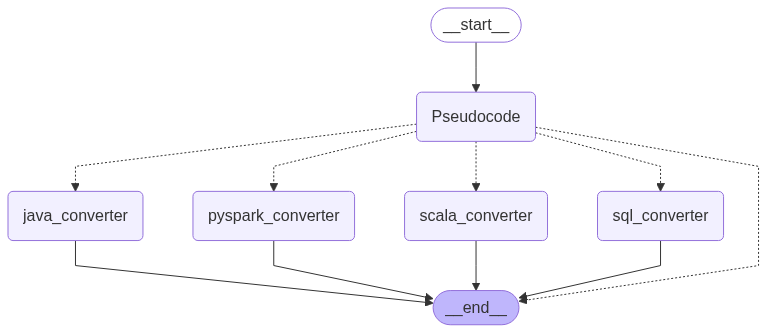

In [33]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))